
- BERT(Bidirectional Encoder Representations from Transformers)는 Google AI에서 개발한 자연어 처리(NLP) 사전 훈련 언어 모델입니다. BERT는 방대한 양의 텍스트 데이터에 대해 양방향으로 학습하여 단어의 의미와 문맥을 이해하는 능력을 갖추고 있습니다.


- 양방향 학습: BERT는 단어의 앞뒤 문맥을 모두 고려하여 학습합니다. 이는 단어의 의미를 보다 정확하게 이해하는 데 도움이 됩니다.

- Transformer 기반: BERT는 Transformer라는 신경망 구조를 기반으로 합니다.

- Transformer는 순환 신경망(RNN)보다 효율적이고 강력한 것으로 알려져 있습니다.

- 사전 훈련: BERT는 대규모 텍스트 데이터에 대해 사전 훈련됩니다. 이는 특정 작업에 대한 별도의 학습 없이도 다양한 NLP 작업을 수행할 수 있도록 합니다.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df_= pd.read_csv('/content/AirlineTweets.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df = df_[['airline_sentiment', 'text']].copy()

In [ ]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

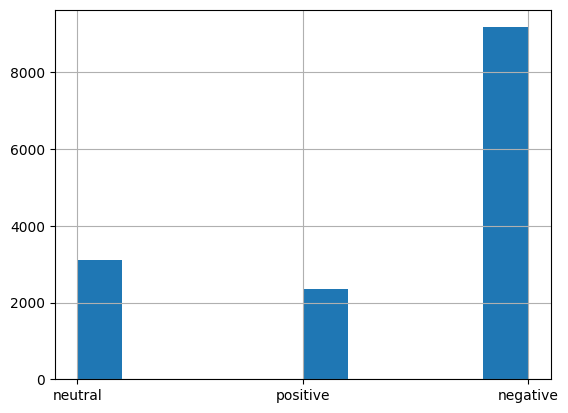

In [ ]:
df['airline_sentiment'].hist()

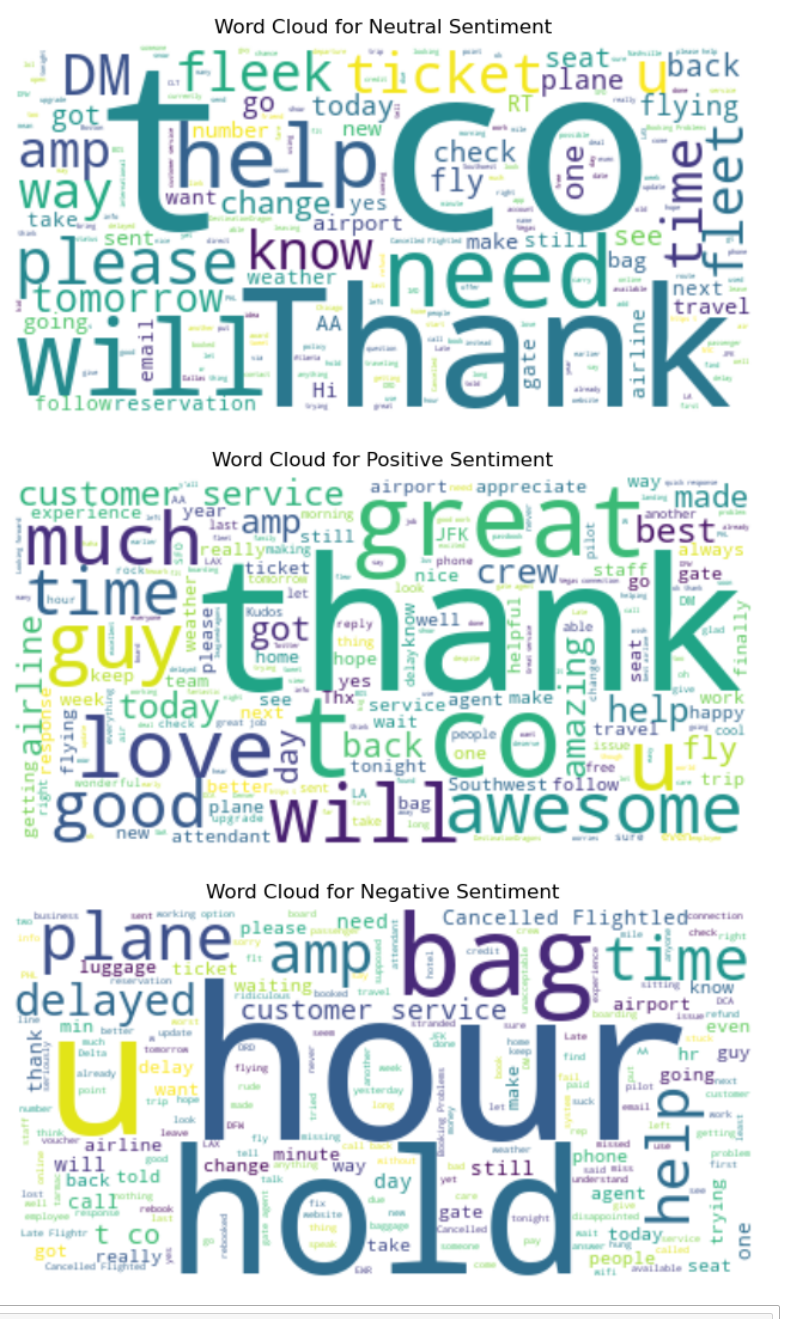

In [ ]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [ ]:
df2 = df[['text', 'target']]
df2.columns = ['sentence', 'label']
df2.to_csv('data.csv', index=None)

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files='data.csv')
# 불러들이면서 train으로 할당

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [ ]:
raw_dataset['train']['sentence'][:10]

['@VirginAmerica What @dhepburn said.',
 "@VirginAmerica plus you've added commercials to the experience... tacky.",
 "@VirginAmerica I didn't today... Must mean I need to take another trip!",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
 '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
 "@virginamerica Well, I didn't…but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."]

In [ ]:
raw_dataset['train']['label'][:10]

[2, 1, 2, 0, 0, 0, 1, 2, 1, 1]

In [ ]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)

In [ ]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [ ]:
# checkpoint 변수는 문자열 값을 저장하는 변수입니다.
# 이 코드는 DistilBERT 모델을 초기화할 때 사용됩니다.
# model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
# 코드를 사용하여 DistilBERT 모델을 초기화할 때 checkpoint 변수의 값을 지정합니다.
# BERT 모델의 Transformer 층을 6개에서 4개로 줄입니다. / BERT 모델의 출력을 128D에서 64D로 줄입니다.
checkpoint = 'distilbert-base-cased'

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
# tokenizer 객체를 사용하여 batch['sentence']에 있는 문장을 토큰화합니다.
# truncation=True 옵션은 문장이 너무 길어 메모리 문제를 일으키지 않도록 문장을 자릅니다.

def tokenize_fn(batch):
  return tokenizer(batch['sentence'], truncation=True)

# batched=True 옵션은 데이터 세트를 배치로 처리하도록 합니다.
# 이는 데이터 세트가 너무 커서 메모리에 모두 적재될 수 없는 경우 유용합니다.
tokenized_datasets = split.map(tokenize_fn, batched=True)




Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig, Trainer, TrainingArguments
config = AutoConfig.from_pretrained(checkpoint)
# 모델을 config에 저장

In [ ]:
config.id2label = {v:k for k, v in target_map.items()}
# 레이블 ID를 레이블 이름으로 매핑합니다.

config.label2id = target_map
# 레이블 이름을 레이블 ID로 매핑하는 모델을 구성합니다.

# target_map 딕셔너리의 키와 값을 바꾸어 config.id2label 변수에 저장하는 코드입니다.


In [ ]:
config.id2label

{1: 'positive', 0: 'negative', 2: 'neutral'}

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, config=config)

# 시퀀스 분류 작업에 사용되는 모델을 로드하는 데 사용됩니다.

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [ ]:
pip list

In [ ]:
!pip install transformers

In [ ]:
!pip install accelerate

In [ ]:
!pip install accelerate -U

In [ ]:
pip install transformers[torch]

In [ ]:
# 하이퍼 파라미터
training_args = TrainingArguments(
  output_dir='training_dir', # 모델 이름
  evaluation_strategy='epoch', # 에포크 마다 평가 - 손실, 정확도
  save_strategy='epoch',
  num_train_epochs=3,
  per_device_train_batch_size=16,
  per_device_eval_batch_size=64,
)

In [ ]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels # logits는 모델의 예측 확률 분포입니다. / labels는 실제 라벨입니다.
  predictions = np.argmax(logits, axis=-1) # np.argmax 함수를 사용하여 logits의 각 클래스에 대한 확률 중 가장 높은 확률을 가진 클래스 인덱스를 계산합니다.
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average='macro')
  return {'accuracy': acc, 'f1': f1}



In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.559600,0.455341,0.825592,0.763758
2,0.354000,0.493846,0.832878,0.769662
3,0.256200,0.623525,0.835838,0.785469


TrainOutput(global_step=1923, training_loss=0.33924589191819626, metrics={'train_runtime': 197.4873, 'train_samples_per_second': 155.676, 'train_steps_per_second': 9.737, 'total_flos': 388879472366064.0, 'train_loss': 0.33924589191819626, 'epoch': 3.0})

In [ ]:
!ls training_dir

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [ ]:
from transformers import pipeline

In [ ]:
savedmodel = pipeline('text-classification',
                      model='training_dir/checkpoint-1923',
                      device=0)

In [ ]:
s = "I don't like study much"
print(s)
savedmodel(s)

I don't like study much


[{'label': 'negative', 'score': 0.689895749092102}]

In [ ]:
s = "I like apple"
print(s)
savedmodel(s)

I like apple


[{'label': 'positive', 'score': 0.9458684325218201}]

In [ ]:
s = "The companies agreed to find a neutral party to help in mediating their dispute."
# 그 회사들은 그들의 분쟁을 조정하는 데 도움이 될 중립적인 당사자를 찾기로 합의했습니다.
print(s)
savedmodel(s)

The companies agreed to find a neutral party to help in mediating their dispute.


[{'label': 'negative', 'score': 0.9463962912559509}]

In [ ]:
s = "Referees have to stay neutral when making calls in soccer games."
# 축구 경기에서 심판들은 통화를 할 때 중립을 지켜야 합니다.
print(s)
savedmodel(s)

Referees have to stay neutral when making calls in soccer games.


[{'label': 'negative', 'score': 0.9562526941299438}]

In [ ]:
s = "I’m not favoring any side"
# 나는 어느 쪽의 편도 들어주지 않습니다.

print(s)
savedmodel(s)

I’m not favoring any side


[{'label': 'negative', 'score': 0.8890786170959473}]

In [ ]:
s = " i am just neutral."
print(s)
savedmodel(s)

 i am just neutral.


[{'label': 'negative', 'score': 0.5425944328308105}]